# 1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть шзные функции потерь, все они
вычисляют расстояние между предсказанным значшием 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

In [3]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [4]:
m ,c  =np.linalg.lstsq(A, y,rcond = None)[0]
print (m,c)

0.9999999999999997 -0.9499999999999992


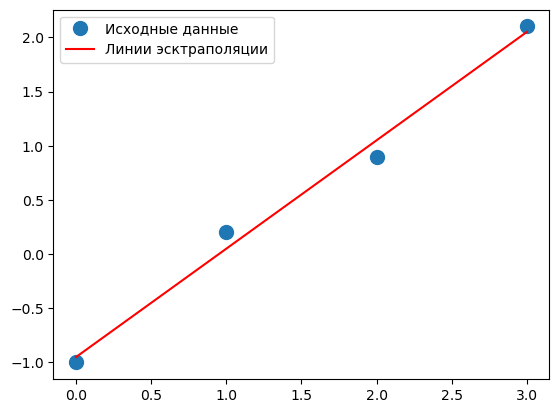

In [9]:
1#.1.1 Пример
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x+c,'r',label = 'Линии эсктраполяции')
plt.legend()
plt.show()

In [23]:
# 1.1.2 Пример
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

In [24]:
x = fromfile('x_data.txt',float,sep = '\n')
y = fromfile('y_data.txt',float,sep = '\n')
print(x)
print(y)

[-4.96828114 -3.86333207 -2.51707904 -1.55560332 -1.04171034  0.14813362
  0.66443883  2.32910126  2.60631299  3.60658139  4.60434831]
[24.94429565 15.92779071  8.66907608  4.13366378  0.79764616 -0.40295946
  0.77714873  3.91284273  9.43164322 15.53369946 25.45172604]


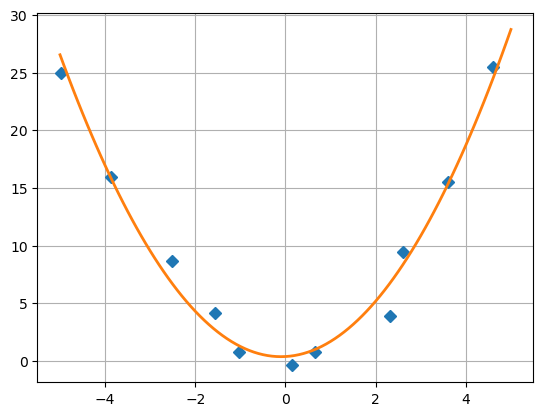

<Figure size 640x480 with 0 Axes>

In [25]:
m = vstack((x**2,x,ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.show()
plt.savefig('парабола.png')

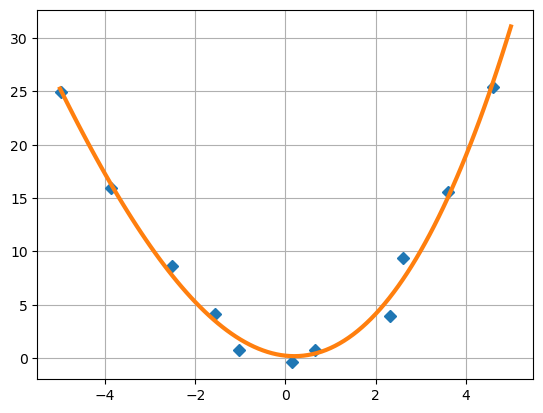

<Figure size 640x480 with 0 Axes>

In [26]:
m = vstack((x**3,x**2,x,ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.show()
plt.savefig('парабола.png')

[  6   1  -5   7   9  -5 -10  -5   2  -3  -1   9   2   3   5  -5  -9   9
  -9   3  -4 -10   3  -3 -10   7  -8  -8  -3   6   7   2   8  -3  -9  -4
  -2  -5  -4   0  -2  -2   8   4  -7  -6   4   7   5  -2  -5   2  -8   3
   5   8  -8   0  -7 -10  -3  -8  -1  -2  -8  -4  -9  -9   9  -6  -9  -9
   3  -5  -6  -8   8   4   9   0   3 -10  -1 -10   6  -9   6   1  -5   5
   0   3   6  -9   4  -1   3  -5   0   0] [  4.08519964   2.67634918  -4.99365702   6.69261916  10.49896471
  -4.39478232 -10.92742865  -5.03372556   2.58262997  -5.27663032
  -0.07834437  10.72788877   3.25641101   4.66371918   6.26128222
  -7.17868695  -6.67009858   6.55827451 -11.05136209   3.12135853
  -1.70567749  -7.60839779   2.69921424  -3.10745725 -12.47714312
   5.95544046  -6.28104674  -8.75479364  -0.90206776   6.75068371
   7.03502339   3.85247867   8.19820828  -2.77645786 -11.02884626
  -2.28603298  -3.17551554  -5.16241738  -3.3661398    0.38580865
  -3.40486808  -2.89601708   6.20430739   2.8395379   -9.32510067

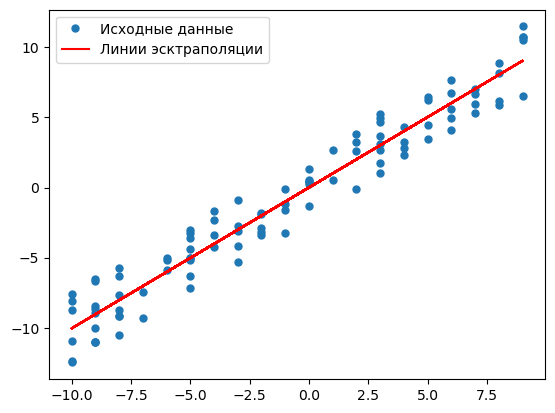

In [71]:
# Задание:
delta =5.0
x = np.array(np.random.randint(-10, 10, 100))
y = x+delta*(rand(100)-0.5)
print (x,y)
A = np.vstack([x, np.ones(100)]).T
A
m ,c  =np.linalg.lstsq(A, y,rcond = None)[0]
print (m,c)
plt.plot(x,y,'o',label = 'Исходные данные', markersize = 5)
plt.plot(x, m*x+c,'r',label = 'Линии эсктраполяции')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

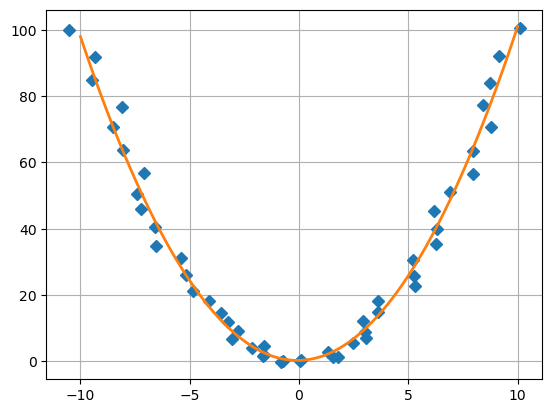

In [62]:
delta =1.5
x = linspace(-10,10,50)
y = x**2+delta*(rand(50)-0.5)
x+=delta*(rand(50)-0.5)
m = vstack((x**2,x,ones(50))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-10,10,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.show

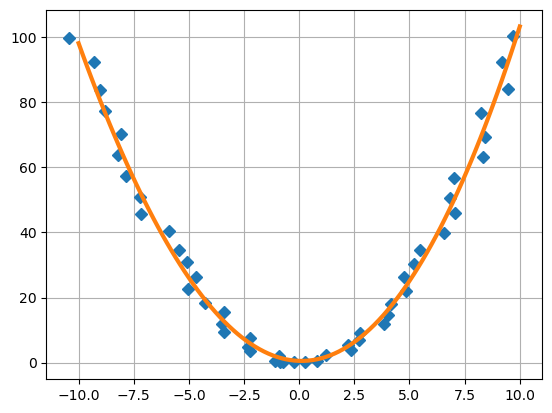

In [56]:
m = vstack((x**3,x**2,x,ones(50))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-10,10,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()

In [74]:
# 1.1.4 Пример
beta = (0.25,0.75,0.5)
def f (x,b0,b1,b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0,5,50)
y = f(xdata,*beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [78]:
from scipy.optimize import curve_fit
beta_opt ,beta_cov = curve_fit(f,xdata,ydata)
beta_opt

array([0.23285895, 0.78867531, 0.52734452])

In [79]:
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)


0.1223504296489914


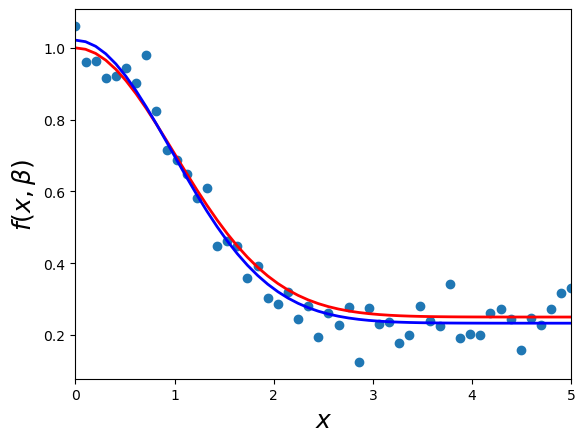

In [83]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()